In [125]:
import numpy as np
import pandas as pd

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import scipy
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import os

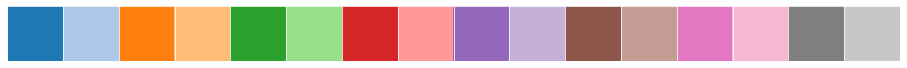

In [126]:
colors = sns.color_palette("tab20", 16)
sns.palplot(colors)
sns.set_style("darkgrid")

In [127]:
cwd = os.getcwd()

# Iteration 1 - Etude du bruit et d'un son

# A Etude du bruit

Avant de commencer à réfléchir à un quelconque test de detection de son, vous décidez d'étudier le bruit de fond. Le bruit c'est en fait tout ce qui ne vous intéresse pas, une fluctuation très faiblement audible (écouter le fichier wav) et qui ne vous dérange pas pendant votre sommeil (vous vivez dans un endroit calme). Ce qui vous intéresse in fine, ce sont les sons (on distingue donc bien les notions de son et de bruit). Mais pour espérer les détecter des **sons**, il vous faut d'abord caractériser **le bruit**.

##  A.0 - Ecouter le fichier "bruit.wav" dans un lecteur audio

## A.1 - Importer le bruit "bruit_seul.txt" dans un array numpy

Vous pouvez utiliser la fonction loadtxt de numpy

In [128]:
bruit_seul_txt = "bruit_seul.txt"
son_txt = "son.txt"

In [129]:
os.chdir(cwd)
os.chdir(cwd+"/Data")

bruit = np.loadtxt(bruit_seul_txt)
son = np.loadtxt(son_txt)


os.chdir(cwd)

In [130]:
df_bruit = pd.DataFrame(bruit, columns = ['bruit_freq'])
df_son = pd.DataFrame(son, columns = ['son_freq'])

### Analyses des dataframe

In [131]:
print(df_son.shape,df_bruit.shape)

(1000000, 1) (1000000, 1)


In [132]:
#df_bruit_seul.dtypes
df_son.dtypes

son_freq    float64
dtype: object

In [133]:
print(df_son.value_counts().idxmax(), df_bruit.value_counts().idxmax())

(-5.3159256969415605,) (-5.3159256969415605,)


In [134]:
df_son.head()

,son_freq
0,0.276235
1,-0.237085
2,-1.098637
3,0.049679
4,-0.109675


In [135]:
print("---------> df_son information")
display(df_son.describe())
print("---------> df_bruit information")
display(df_son.describe())

---------> df_son information


,son_freq
count,1000000.000000
mean,0.000903
std,1.003336
min,-5.315926
25%,-0.675015
50%,-0.000128
75%,0.676895
max,5.736037


---------> df_bruit information


,son_freq
count,1000000.000000
mean,0.000903
std,1.003336
min,-5.315926
25%,-0.675015
50%,-0.000128
75%,0.676895
max,5.736037


## A.2 - Plotter l'amplitude mesurée (en vr) en fonction du temps pour la première seconde d'enregistrement
On rappelle que la fréquence d'échantillonnage est 48 kHz

In [136]:
freq_ech = 48000 #Frequence en Hz

<AxesSubplot:>

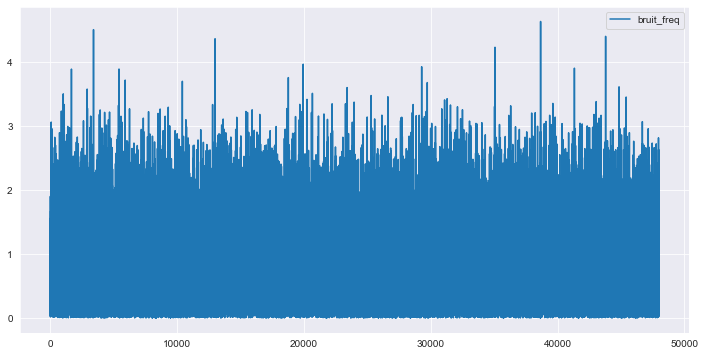

In [137]:
df_bruit.loc[:48000].abs().plot(figsize=(12,6))

In [138]:
def add_new_index(df):
    duration = len(df) / freq_ech
    # Create a new index with a frequency of 1 sample per 48000 Hz
    new_index = pd.Index(np.arange(0, duration, 1/freq_ech), name='time')
    df = df.set_index(new_index)
    return df

In [139]:
df_son = add_new_index(df_son)
df_bruit = add_new_index(df_bruit)
print("On retrouve bien notre enregistrement de 20s")
df_bruit

On retrouve bien notre enregistrement de 20s


,bruit_freq
time,
0.000000,0.492209
0.000021,0.189033
0.000042,1.509044
0.000063,0.677286
0.000083,-0.402110
...,...
20.833229,-0.500145
20.833250,-0.288808
20.833271,-0.142364


### Amplitude absolue premiere seconde

,bruit_freq
time,
0.000000,0.492209
0.000021,0.189033
0.000042,1.509044
0.000063,0.677286
0.000083,-0.402110


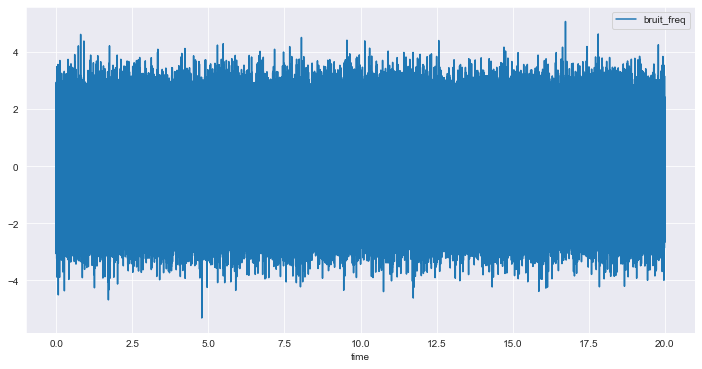

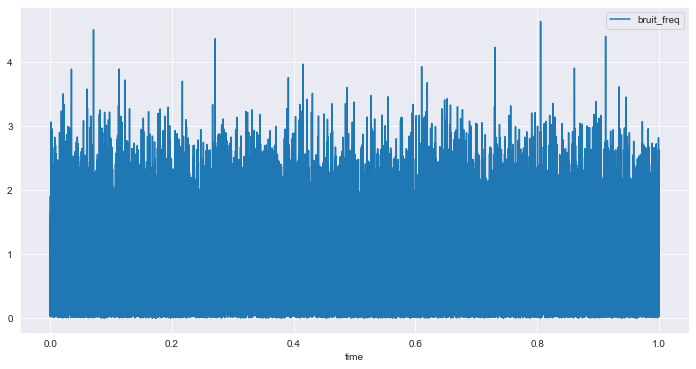

In [140]:
df_bruit.loc[:20].plot(figsize=(12,6))
df_bruit.loc[:1].abs().plot(figsize=(12,6))
df_bruit.head()

## A.3 - Afficher les probability density function (PDF) et  la cumulative distribution function (CDF) empiriques de l'amplitude du bruit en va

In [141]:
df_bruit.abs()

,bruit_freq
time,
0.000000,0.492209
0.000021,0.189033
0.000042,1.509044
0.000063,0.677286
0.000083,0.402110
...,...
20.833229,0.500145
20.833250,0.288808
20.833271,0.142364


In [142]:
df_bruit.abs().cumsum()

,bruit_freq
time,
0.000000,0.492209
0.000021,0.681243
0.000042,2.190287
0.000063,2.867573
0.000083,3.269684
...,...
20.833229,797885.063824
20.833250,797885.352633
20.833271,797885.494996


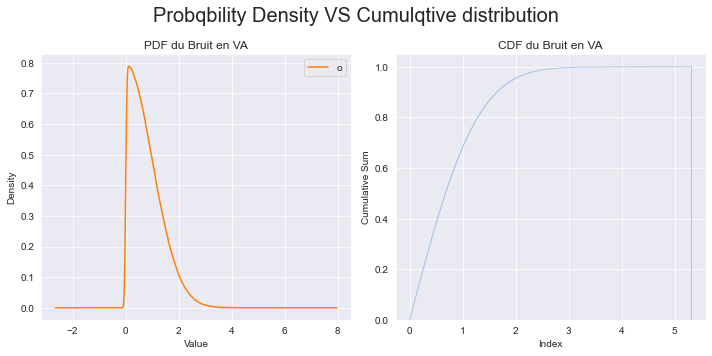

In [143]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle("Probqbility Density VS Cumulqtive distribution", fontsize=20)
sns.set_style("darkgrid")

df = df_bruit

# plot the probability density on the right axis
df_bruit.abs().plot(
    ax=axs[0],
    kind='density',
    color=colors[2]
)

axs[0].set_title('PDF du Bruit en VA')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')
axs[0].legend("oui")


# plot the cumulative shape on the left axis
df_bruit.abs().hist(
    ax=axs[1],
    bins=1000, 
    histtype='step', 
    density=True,
    cumulative=1,
    label='Reversed emp.',
    color=colors[1]
)

axs[1].set_title('CDF du Bruit en VA')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Cumulative Sum')


# adjust the layout and display the plot
plt.tight_layout()
plt.show()

## A.4 - Identifier les 2 lois de probabilités obtenues à la question précédente 

### a - Pouvez-vous identifier les 2 fonctions ?

Au vu de la forme des 2 fonctions, à quelles fonction analytiques ressemblent-elles ? Si vous avez une idée précise, identifiez la et donnez ses coefficients caractéristiques.
Sinon rendez-vous question suivante :)

In [144]:
df_bruit.abs().describe()

,bruit_freq
count,1000000.000000
mean,0.797887
std,0.602644
min,0.000002
25%,0.318673
50%,0.674425
75%,1.150025
max,5.315926


### b - Calculez la moyenne et l'écart type du bruit (pas en valeur absolue cette fois)
Info : la classe `nd_array` du module `numpy` possède des méthodes qui font ça directement.

In [145]:
df_bruit.describe()

,bruit_freq
count,1000000.000000
mean,0.002100
std,0.999899
min,-5.315926
25%,-0.672359
50%,0.000987
75%,0.676680
max,5.086007


### c - 1 - Sur le même graphe, affichez la PDF de $ \mid bruit \mid $ et la gaussienne de moyenne et d'écart type calculée question précédente

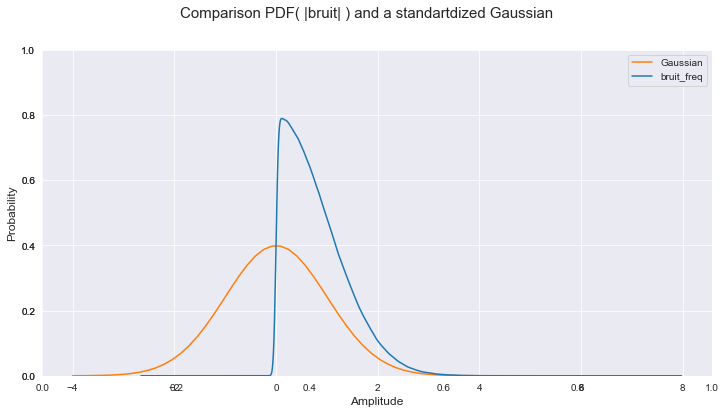

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle("Comparison PDF( |bruit| ) and a standartdized Gaussian", fontsize=15)
sns.set_style("darkgrid")
ax = fig.subplots()

df_bruit_mean = df_bruit.mean()[0]
df_bruit_std = df_bruit.std()[0]
 
# Calculating probability density function (PDF)
x=np.linspace(-4,4)
pdf = stats.norm.pdf(x, df_bruit_mean, df_bruit_std)

# Drawing a graph
ax.plot(x,
        pdf, 
        color=colors[2],
        label="Gaussian"
       )
df_bruit.abs().plot(
    ax=ax,
    kind='density',
    color=colors[0],
    label="PDF - |bruit|"
)
ax.set_ylim([0, 1])
ax.set_xlabel("Amplitude", size=12)    
ax.set_ylabel("Probability", size=12)     
ax.legend()

plt.show()

### c - 2 - Expliquez la différence entre les deux courbes.


## A.5 - Evaluer la probabilité des amplitudes du bruit pour différentes plages d'amplitudes

Ici comme très souvent on différencie le bruit du son. Le bruit est une fluctuation statistique, alors que le son est porteur d'information.

On va considérer dans la suite de cette itération que le bruit est parfaitement caractérisé par une loi demi-normale, de moyenne $\mu =0$ et d'écart type $\sigma = 1 $. Sa fonction de densité (PDF) est :
$$ f(x) = \frac{2}{\sigma \sqrt{2 \pi}} \mathrm{e}^{- \frac{1}{2} \left( \frac{ (x - \mu)^2}{\sigma^2} \right)  }$$

On utilisera donc pour répondre aux questions suivantes (A.5) les CDF et PDF analytiques (c'est à dire théoriques) puisque l'on fait l'hypothèse que notre bruit est régi par une distribution demi-normale.

Vous pouvez explorer la doc de scipy.stats pour trouver les fonctions associées à diverses distributions : https://docs.scipy.org/doc/scipy/tutorial/stats.html

### a -  Donner la formule analytique de la fonction de répartition (CDF) de la loi demi-normale
(Pour les plus matheux elle peut se déduire de la PDF, sinon wikipedia est votre ami).

On va considérer dans la suite de cette itération que le bruit est parfaitement caractérisé par une loi demi-normale, de moyenne $\mu =0$ et d'écart type $\sigma = 1 $. Sa fonction de densité (PDF) est :
$$ f(x) = 2* \frac{2}{\sigma \sqrt{2 \pi}} \mathrm{e}^{- \frac{1}{2} \left( \frac{ (x)^2}{\sigma^2} \right)  } si x>0$$
$$ 0, si x<0 $$

### b - 1 Probabilités sur les amplitudes du bruit

* Quelle est la probabilité d'observer des amplitudes comprises dans $[0 , \sigma]$  ?
* Même question pour $[0 , 2\sigma]$
* Même question pour $[0, 3\sigma]$


In [147]:
mu = 0
sigma = 1

#### CDF --> Prend un amplitude et renvoie une proba
--> C'est l'air sous la courbe de [-inf, a]

In [148]:
def prob_interval(val_inf, val_sup):

    a = val_inf
    b = val_sup

    dist = stats.halfnorm(scale=sigma, loc=mu)
    prob = dist.cdf(b) - dist.cdf(a)
    return prob

In [149]:
print(f"{round(prob_interval(0,sigma),4)} %")
print(f"{round(prob_interval(0,2*sigma),4)} %")
print(f"{round(prob_interval(0,3*sigma),4)} %")

0.6827 %
0.9545 %
0.9973 %


### b - 2 Probabilités sur les amplitudes du bruit

À l'inverse on s'intéresse maintenant aux amplitudes comprises dans l'intervalle  $[a,\infty]$ (avec $a > 0$).

Déterminer les valeur de a pour que la probabilité de d'observer une amplitude supérieure à $a$ (donc comprise dans $[a,\infty]$) soit de :

- 5 %
- 1%
- 0.1%


#### 

#### A l'inverse, on peut récupérer l'amplitude A, à partir de la proba --> ppf(P(a)) = amp
--> Cependant il faut etre prudent. La ppf prend en entrée la probabilité P(a) d'avoir une valeur entre [0, amp]
--> Si l'on veut récupérer la probabilité d'être entre [amp, +inf] il faut donc changer la probabilité en input
--> on regardera ppf(1-P(a))

In [150]:
def find_a_given_prob(prob):
    a=0
    probTemp=1
    while probTemp > prob :
        probTemp = stats.halfnorm.sf(a, scale=sigma, loc=mu)
        a += 0.001
    print(f"a = {round(a, 3)} --> probabilty : {probTemp}")    
    return a

In [151]:
find_a_given_prob(0.05)
find_a_given_prob(0.01)
find_a_given_prob(0.001)

a = 1.961 --> probabilty : 0.04999579029645318
a = 2.577 --> probabilty : 0.009995064631475037
a = 3.292 --> probabilty : 0.0009983191327647134


3.2919999999997485

In [152]:
print(stats.halfnorm.ppf(1-0.05, scale=sigma, loc=mu))
print(stats.halfnorm.ppf(1-0.01, scale=sigma, loc=mu))
print(stats.halfnorm.ppf(1-0.001, scale=sigma, loc=mu))

1.959963984540054
2.5758293035489004
3.2905267314919255


# B - Etude d'un son

Vous avez réalisé un enregistrement pendant la nuit. En inspectant rapidement la courbe amplitude(temps), il vous semble voir quelque chose de particulier, et vous soupçonnez fortement qu'il ne s'agisse pas du bruit mais d'un son (une tentative d'effraction ?). Vous trouverez l'extrait en question dans le fichier "son.wav".

In [153]:
df_son

,son_freq
time,
0.000000,0.276235
0.000021,-0.237085
0.000042,-1.098637
0.000063,0.049679
0.000083,-0.109675
...,...
20.833229,-0.066749
20.833250,1.040575
20.833271,-0.747036


## B.1 -  Importez le fichier "son.txt" dans un array numpy et faites un plot comparant un zone exclusivement bruitée et une zone de son

<AxesSubplot:xlabel='time'>

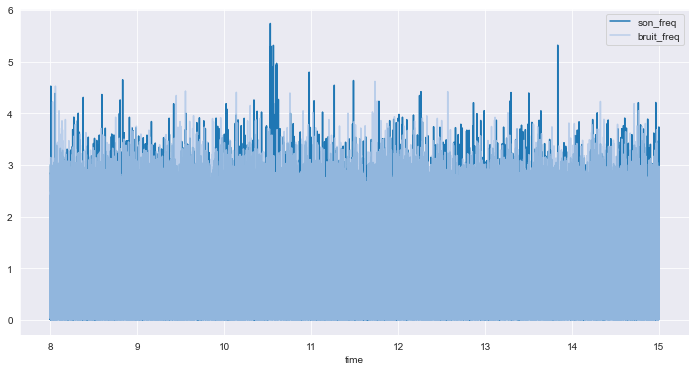

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_son.abs().loc[8:15].plot(
    ax=ax,
    color=colors[0],
    alpha=1
)
df_bruit.abs().loc[8:15].plot(
    ax=ax,
    color=colors[1],
    alpha=0.8
)

## B.2 -  Identifier approximativement la zone de son et afficher la PDF et la CDF empiriques de l'amplitude (en va), quelle différence avec celles du bruit ?

### Comparaison des PDF et CDF

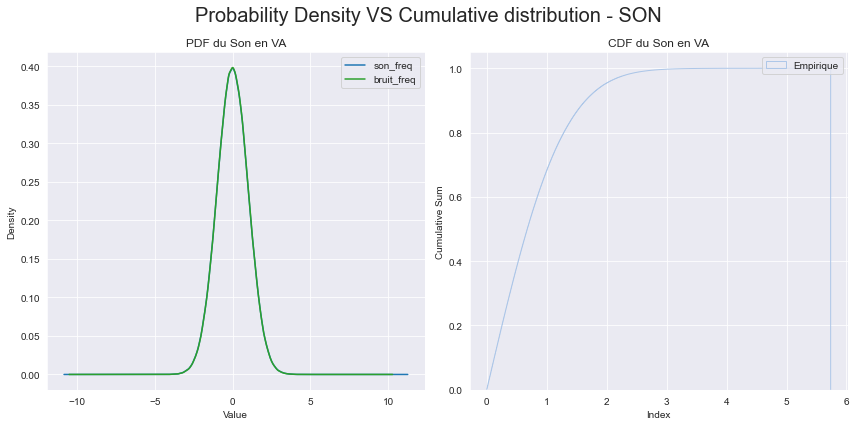

In [155]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle("Probability Density VS Cumulative distribution - SON", fontsize=20)
sns.set_style("darkgrid")

df = df_son

# plot the probability density on the right axis
df_son.plot(
    ax=axs[0],
    kind='density',
    color=colors[0],
    label="Son"
)
df_bruit.plot(
    ax=axs[0],
    kind='density',
    color=colors[4],
    label="Bruit"
)

axs[0].set_title('PDF du Son en VA')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Density')
axs[0].legend("oui")


# plot the cumulative shape on the left axis
df.abs().hist(
    ax=axs[1],
    bins=1000, 
    histtype='step', 
    density=True,
    cumulative=1,
    label='Empirique',
    color=colors[1]
)

axs[1].set_title('CDF du Son en VA')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Cumulative Sum')
axs[1].legend()
axs[0].legend()

# adjust the layout and display the plot
plt.tight_layout()
plt.show()

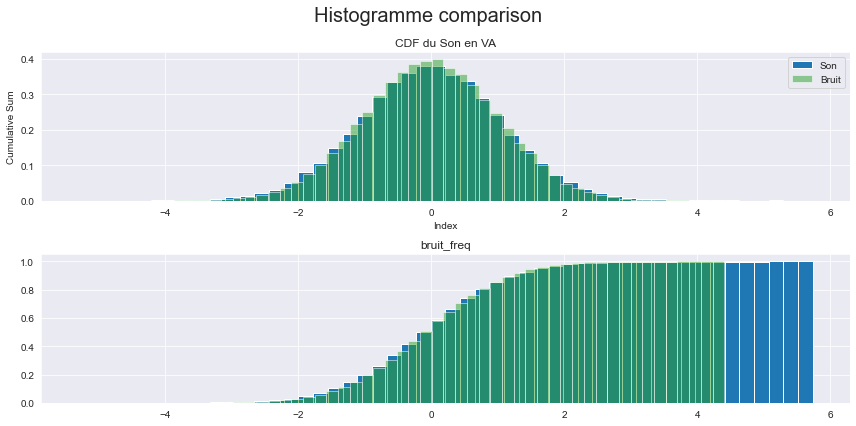

In [156]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

fig.suptitle("Histogramme comparison", fontsize=20)
sns.set_style("darkgrid")

bins_size=50

# plot the probability density on the right axis
df_son.loc[10:11].hist(
    ax=ax[0],
    bins=bins_size,
    density=True,
    color=colors[0],
    alpha=1,
    label="Son"
)
df_bruit.loc[10:11].hist(
    ax=ax[0],
    bins=bins_size,
    density=True,
    color=colors[4],
    alpha=0.5,
    label="Bruit"
)

# plot the probability density on the right axis
df_son.loc[10:11].hist(
    ax=ax[1],
    bins=bins_size,
    density=True,
    cumulative=1,
    color=colors[0],
    alpha=1,
    label="Son"
)
df_bruit.loc[10:11].hist(
    ax=ax[1],
    bins=bins_size,
    density=True,
    cumulative=1,
    color=colors[4],
    alpha=0.5,
    label="Bruit"
)


ax[0].set_title('CDF du Son en VA')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Cumulative Sum')
ax[0].legend()


# adjust the layout and display the plot
plt.tight_layout()
plt.show()

## B.3 - Afficher pour différents seuils d’amplitude (en va) les index où l’amplitude est supérieure à ce seuil (en plottant avec deux couleurs différentes par exemple). 

Conclure sur la possibilité d'identifier l'intervalle du son avec cette méthode.

In [157]:
tresholdParam = 0.11

In [158]:
treshold = df_son.abs().quantile(0.9*(1+tresholdParam))[0]
treshold = 4

In [159]:
mask = (df_son.abs()["son_freq"] > treshold).to_frame()
mask.value_counts()

son_freq
False       999904
True            96
dtype: int64

In [160]:
indices = mask.index[mask["son_freq"] == True].tolist()
len(indices)

96

In [161]:
def get_indices_from_treshold(treshold):
    mask = (df_son.abs()["son_freq"] > treshold).to_frame()
    indices = mask.index[mask["son_freq"] == True].tolist()
    return indices

In [162]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


slider = widgets.FloatSlider(value=4.5, min=4,max=6, step=0.5)
@interact(val = slider)
def densityplot(val):
    indices = get_indices_from_treshold(val)
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    fig.suptitle("|Son| avec les valeurs au dessus du treshold", fontsize=20)
    sns.set_style("darkgrid")
    
    df = df_son.abs().loc[10:12]
    
    # plot the probability density on the right axis
    sns.lineplot(
        ax=ax,
        data=df,
        color=colors[0],
        label="Son",
        alpha=0.8
    )
    
    for i in indices:
        plt.axvline(x=i, color=colors[2], linestyle='--')
    
    plt.axhline(y=treshold, color=colors[4])
    
    ax.set_title('PDF du Son en VA')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend("oui")
    
    
    ax.legend()
    
    # adjust the layout and display the plot
    plt.tight_layout()
    print(f"Computed with {val}")
    print(f"{len(indices)} values found")
    plt.show()
    
    return val

interactive(children=(FloatSlider(value=4.5, description='val', max=6.0, min=4.0, step=0.5), Output()), _dom_c…

----

-----

In [163]:
slider.value

4.5

# Itération 2 - Test d'hypothèse

Plutôt que de faire des tests sur les occurences ponctuelles d'amplitude supérieure à une valeur seuil, vous décidez de faire une étude similaire portant sur le nombre d'occurences durant un certain temps. De cette manière, si le bruit atteint ponctuellement une amplitude importante, on peut se douter qu'il a très peu de chance de réitérer cet "exploit" beaucoup de fois dans un intervalle de temps court. Tout l'enjeu sera de quantifier cette "chance" (ie cette probabilité).

# A - Un peu de proba


* On note une limite d'amplitude $a_l$. La probabilité d'obtenir sur une unique mesure (on peut dire tirage comme pour les jeux de hasard) une amplitude $a$, telle que $a \geq a_l $ est notée $p$.
* On note $n$, le nombre d'amplitudes mesurées sur un intervalle (échantillon).
* On note $k$ un entier positif inférieur ou égal à $n$. 



## A.1 - Donnez la formule de $P_k^{n}$, la probabilité de  tirer $k$ fois une amplitude supérieure ou égale à $a_l$ lors de $n$ tirages.

Les plus affamés d'entre vous peuvent la démontrer. Sinon une recherche sur internet suffira largement.


$$ P(A^N_k) =  \binom{N}{k} \cdot p^kq^{N-k}$$


1.0


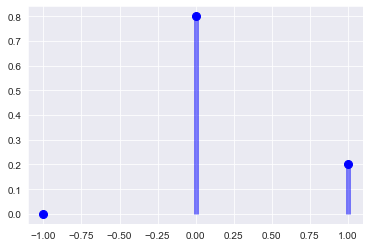

In [164]:
p=0.2
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')

x = range(-1,2)
ax.plot(x, stats.bernoulli.pmf(x, p), 'bo', ms=8, label='bernoulli pmf')
ax.vlines(x, 0, stats.bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

print(stats.bernoulli.ppf(1, p))

## A.3 - Soit $n =20 $ : Analyse des probabilités de succès k dépendant de p


### a - Pour plusieurs valeurs de $p$, calculez $P_k^{n}$ pour chaque $k=1..n$


In [165]:
n = 20
p = 0.2

# En abscisse on veut le nombre k de succés
# On va calculer la pmf de chaque x en prenant l'hypothèse que l'expérience suit une loi binomiale
x = range(n+1)
px = stats.binom.pmf(x, n, p)


ptot = sum(px)
print(ptot)
print("eeeeeeet pas vraiment --> 1")

1.0000000000000009
eeeeeeet pas vraiment --> 1


###  b - Affichez en une sur un plot en barre

<BarContainer object of 21 artists>

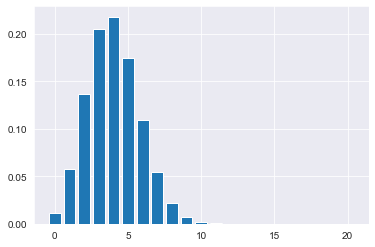

In [166]:
plt.bar(x,px)

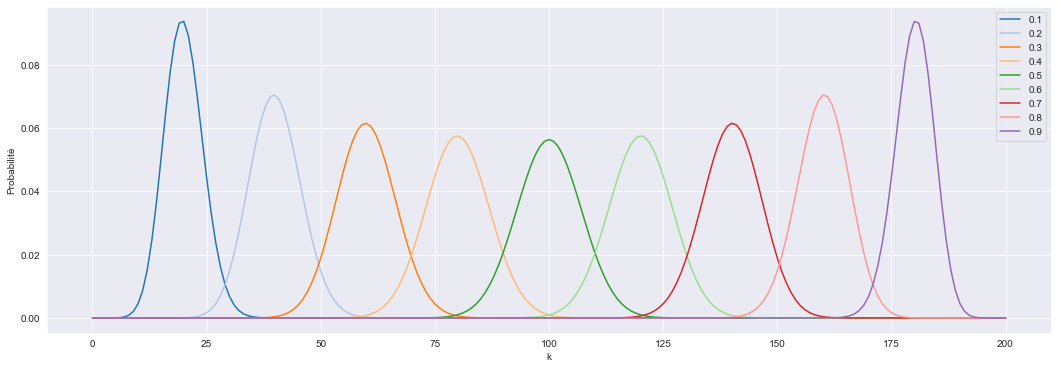

p représente la probabilité d'être True
Plus la probabilité est grande, plus la probabilité d'obtenir k réussite sur n augmente
Exemple : Avec 90% de chance de réussir, la probabilité d'obtenir 18 lancés True est de 0.3


In [167]:
fig, ax = plt.subplots(1, 1, figsize=(18,6))

n = 200
mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk')

x = range(n+1)

for i, p in enumerate(np.arange(0.1, 1.0, 0.1).tolist()):
    p = round(p,1)
    #On calcule chaque probabilité pour chaque x
    ax.plot(
        x, 
        stats.binom.pmf(x, n, p),
        color=colors[i],
        label=p)
ax.set_xlabel("k", fontsize=10)
ax.set_ylabel("Probabilité", fontsize=10)
ax.legend()
plt.show()
print("p représente la probabilité d'être True")
print("Plus la probabilité est grande, plus la probabilité d'obtenir k réussite sur n augmente")
print("Exemple : Avec 90% de chance de réussir, la probabilité d'obtenir 18 lancés True est de 0.3")

# B - Construction du test d'hypothèse

Vous voulez donc construire votre test d'hypothèse. On s'appuiera pour ce test sur la loi binomiale étudiée partie A. Pour cela, vous avez besoin de définir une hypothèse nulle, une hypothèse alternative, ainsi qu'un critère de significativité.

* Il faudra identifier l'amplitude $a_l$ correspondant à une probabilité $p$. Cette probabilité correspond à la probabilité, sur une seule mesure du bruit, d'obtenir une amplitude supérieure ou égale à $a_l$. Donc vous devrez décider d'abord de la valeur de $p$ pour en déduire $a_l$ (si vous êtes confus, revoyez la partie 4-b de l'itération 1).
* Vous aurez besoin de choisir un $n$. Vous comptabiliserez pour un intervalle comprenant $n$ mesures, le nombre $N_a$ de fois que vous aurez obtenu une mesure $a \geq a_l$.

Mais d'abord :

## B.1 - Questions théoriques (sans code)

### a - Caractérisez l'hypothèse nulle de votre test $H_{0} $

### b - Caractérisez l'hypothèse alternative $H_1$ (ou $H_a$ selon les gouts)

### c - Identifier l'élément mesurable (i.e. la statistique) qui permettra de réaliser le test

### d - Rappeler la loi de probabilité de cet élément mesurable (ie cette statistique "sous" $H_0$)


### e -  Définir la p-value d'un test (donner la formule), et la valeur qu'elle prend pour ce test en particulier



### f - Étant donné le seuil de significativité $\alpha$, identifier dans quelles situations $H_0$ sera rejetée, ou bien  non rejetée.

## B.2 Réaliser un test d'hypothèse :

Comme énoncé au début de cette partie B, il faut choisir une valeur pour $p$ et pour $n$. On se fixera $n = 100$, et $p = 0.01$. On se donnera également $\alpha = 0.05 $.

On commencera d'abord par travailler sur un intervalle de 100 mesures au milieu du signal sonore, entre les indices : $[505400, 505500]$.

### B.2.a - Plotter la PMF loi de probabilité de l'élément mesurable "sous" $H_0$

In [203]:
interval = [505400,505500]
df_test = df_son.abs()

In [204]:
df_test.reset_index(drop=True)
df_test.iloc[5000]["son_freq"]

0.6324947944827675

In [205]:
treshold = 2.57

def get_number_outliers(intervalInf, intervalSup):
    outliers = 0
    inf = intervalInf
    sup = intervalSup
    for value in range(inf,sup):
        amp = df_test.iloc[value]["son_freq"]
        if amp > treshold:
            outliers += 1
    print(f"On compte --> {outliers} <-- valeurs > 2.57")
    return outliers

In [206]:
outliers = get_number_outliers(505400, 505500)

On compte --> 11 <-- valeurs > 2.57


In [208]:
x = outliers-1
n=100
p=0.01

prob = 1 - stats.binom.cdf(x, n, p)
prob

6.255518436582008e-09

In [209]:
stats.halfnorm.ppf(1-prob)

5.809779483726614